# Stock Market Forecasting using News


## 0. Getting data

In [0]:
!pip install yfinance
!pip install nltk

In [0]:
import yfinance as yf
import pandas as pd

msft = yf.Ticker("SPY")

# get historical market data
hist = msft.history(period="max")

hist['Open_Next_Day'] = hist['Open'].shift(-1)

hist['diff'] = hist['Open_Next_Day'] - hist['Open']
hist['diff_day_earlier'] = hist['diff'].shift(+1)
hist['diff_2days_earlier'] = hist['diff'].shift(+2)
hist['diff_3days_earlier'] = hist['diff'].shift(+3)
hist = hist[3:]

msft = yf.Ticker("GOLD")
gold = msft.history(period="max")

msft = yf.Ticker("CL=F")
oil = msft.history(period="max")

oil['Open_Next_Day'] = oil['Open'].shift(-1)
gold['Open_Next_Day'] = gold['Open'].shift(-1)

oil['Oil_Earlier'] = (oil['Open_Next_Day']-oil['Open']).shift(+1)
gold['Gold_Earlier'] = (gold['Open_Next_Day']-gold['Open']).shift(+1)


## 1. Exploring data

<bound method NDFrame.head of               Open    High     Low   Close    Volume  Dividends  Stock Splits  \
Date                                                                            
1993-02-03   26.74   27.00   26.72   26.98    529400        0.0             0   
1993-02-04   27.07   27.15   26.77   27.09    531500        0.0             0   
1993-02-05   27.07   27.13   26.92   27.07    492100        0.0             0   
1993-02-08   27.07   27.17   27.04   27.07    596100        0.0             0   
1993-02-09   26.98   26.98   26.83   26.89    122100        0.0             0   
...            ...     ...     ...     ...       ...        ...           ...   
2020-02-13  335.86  338.12  335.56  337.06  54501900        0.0             0   
2020-02-14  337.51  337.73  336.20  337.60  64582200        0.0             0   
2020-02-18  336.51  337.67  335.21  336.73  57226200        0.0             0   
2020-02-19  337.79  339.08  337.48  338.34  48814700        0.0             0  

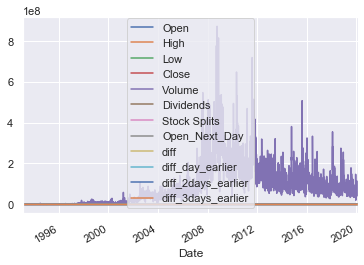

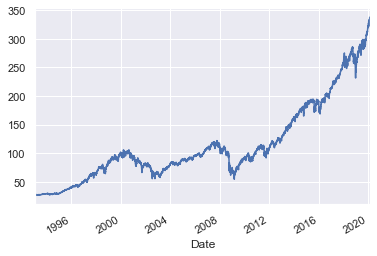

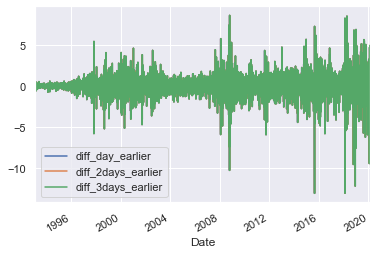

Unique values in 'Dividends'
[0.    0.213 0.318 0.286 0.317 0.271 0.305 0.288 0.363 0.268 0.316 0.312
 0.382 0.285 0.351 0.352 0.367 0.299 0.35  0.348 0.38  0.313 0.359 0.392
 0.32  0.405 0.372 0.371 0.375 0.411 0.346 0.369 0.393 0.331 0.353 0.378
 0.436 0.354 0.36  0.4   0.516 0.395 0.414 0.469 0.568 0.467 0.488 0.522
 0.672 0.519 0.555 0.579 0.793 0.551 0.656 0.719 0.775 0.642 0.669 0.691
 0.561 0.518 0.508 0.59  0.48  0.531 0.602 0.653 0.553 0.628 0.625 0.77
 0.614 0.688 0.779 1.022 0.694 0.839 0.838 0.98  0.825 0.937 0.939 1.135
 0.931 1.03  1.033 1.212 1.05  1.078 1.082 1.329 1.183 1.235 1.351 1.097
 1.246 1.323 1.435 1.233 1.432 1.384 1.57 ]


Unique values in 'Stock Splits'




In [0]:
print(hist.head)
print(type(hist))

# As can be seen, the markets are not open on weekends (and certain holodays), some dates are, therefore, missing

from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline

#show all
hist.plot()
pyplot.show()

#show Open
hist['Open'].plot()
pyplot.show()

#show Close
hist[['diff_day_earlier','diff_2days_earlier','diff_3days_earlier']].plot()
pyplot.show()

print('Unique values in \'Dividends\'')
print(hist['Dividends'].unique())

print('')
print('')

print('Unique values in \'Stock Splits\'')
#print(hist['Stock Splits'].unique())

hist.pop('Stock Splits')

print('')
print('')


In [0]:
print(len(hist))

print(hist.head)

corrMatrix = hist.corr()
print(corrMatrix)

6811
<bound method NDFrame.head of               Open    High     Low   Close    Volume  Dividends  \
Date                                                              
1993-02-03   26.74   27.00   26.72   26.98    529400        0.0   
1993-02-04   27.07   27.15   26.77   27.09    531500        0.0   
1993-02-05   27.07   27.13   26.92   27.07    492100        0.0   
1993-02-08   27.07   27.17   27.04   27.07    596100        0.0   
1993-02-09   26.98   26.98   26.83   26.89    122100        0.0   
...            ...     ...     ...     ...       ...        ...   
2020-02-13  335.86  338.12  335.56  337.06  54501900        0.0   
2020-02-14  337.51  337.73  336.20  337.60  64582200        0.0   
2020-02-18  336.51  337.67  335.21  336.73  57226200        0.0   
2020-02-19  337.79  339.08  337.48  338.34  48814700        0.0   
2020-02-20  337.74  338.64  333.68  336.95  73906100        0.0   

            Open_Next_Day  diff  diff_day_earlier  diff_2days_earlier  \
Date                

In [0]:
# World News 
# https://www.kaggle.com/snapcrack/all-the-news

import urllib.request

urllib.request.urlretrieve('https://www.whoop.ch/articles1.csv.zip')

urllib.request.urlretrieve('https://www.whoop.ch/articles2.csv.zip')

urllib.request.urlretrieve('https://www.whoop.ch/articles3.csv.zip')


!dir

 Volume in drive C has no label.
 Volume Serial Number is 4CF9-39C0

 Directory of C:\Users\twang

02/21/2020  08:51 PM    <DIR>          .
02/21/2020  08:51 PM    <DIR>          ..
02/20/2020  09:09 PM    <DIR>          .conda
02/20/2020  09:21 PM    <DIR>          .config
02/19/2020  01:27 PM               202 .gitconfig
02/21/2020  05:00 PM    <DIR>          .ipynb_checkpoints
02/20/2020  09:21 PM    <DIR>          .ipython
02/21/2020  01:21 PM    <DIR>          .jupyter
02/21/2020  05:53 PM    <DIR>          .keras
02/21/2020  01:22 PM    <DIR>          .matplotlib
02/20/2020  10:38 PM    <DIR>          .spyder
02/21/2020  11:25 AM    <DIR>          .spyder-py3
02/21/2020  08:45 PM         1,131,281 13428_2012_314_MOESM1_ESM.zip
02/18/2020  06:50 PM    <DIR>          3D Objects
02/21/2020  06:04 PM    <DIR>          Anaconda3
02/21/2020  05:14 PM       203,539,364 articles1.csv
02/21/2020  05:12 PM        77,384,753 articles1.csv.zip
02/21/2020  05:14 PM       225,757,056 articles2

In [0]:
from zipfile import ZipFile
with ZipFile('articles1.csv.zip', 'r') as zf:
    zf.extractall('')
with ZipFile('articles2.csv.zip', 'r') as zf:
    zf.extractall('')
with ZipFile('articles3.csv.zip', 'r') as zf:
    zf.extractall('')

In [0]:
df1 = pd.read_csv("articles1.csv",index_col=0,header=0)
df2 = pd.read_csv("articles2.csv",index_col=0,header=0)
df3 = pd.read_csv("articles3.csv",index_col=0,header=0)

df = pd.concat([df1,df2,df3])
print(type(df['date'][0]))
df['date'].unique()[:10]

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.sort_values(by=['date'])

print(df.head)
print(df['date'].unique()[:10])

# show all publications
print(df['publication'].unique())

# keep only ...
# df = df[(df.publication == 'CNN') | (df.publication == 'Fox News') | (df.publication == 'Washington Post') | (df.publication == 'Reuters') | (df.publication == 'New York Post')]
df = df[(df.publication == 'Business Insider')]

df


<class 'str'>
2000-05-15 00:00:00
<bound method NDFrame.head of             id                                              title  \
108489  162183  How Nirvana’s ’Smells Like Teen Spirit’ Became...   
65490    89568         Everything changes. Everything. Especially   
111764  166319  David Bowie On The Ziggy Stardust Years: ’We W...   
61037    83402                 Nancy Reagan’s Alzheimer’s Crusade   
64724    87592                               One final thought on   
...        ...                                                ...   
104667  153480  The view from Middletown: For Bernie Sanders s...   
105410  155706  Progress Personified: NYC subway hero takes hi...   
105829  156281  Enter the Defining Moment contest for a chance...   
106447  157150  The view from Middletown: join Gary Younge for...   
106908  157780        The secret to happiness is all in your head   

                publication       author       date    year  month  \
108489                  NPR      Guy 

In [0]:
# give an example
len(df.loc[df['date'] == hist.index[0]])
df.loc[df['date'] == hist.index[6002]]

,id,title,publication,author,date,year,month,url,content
52746,72771,"Newt Gingrich goes in on Romney, accuses him o...",Business Insider,Bryan Logan,2016-12-01,2016.0,12.0,NaN,’ ’ ” Newt Gingrich sounded off Wednesday o...
52759,72785,A new technology is being developed using just...,Business Insider,Lydia Ramsey,2016-12-01,2016.0,12.0,NaN,"’’ ’’ ’To keep things that chilly, the machine..."
52747,72772,The Fed confirmed some of the most troubling t...,Business Insider,Akin Oyedele,2016-12-01,2016.0,12.0,NaN,’ ’ ” The Federal Reserve on Wednesday supp...
52748,72773,Obama quietly expanded the US’ war on terror —...,Business Insider,Natasha Bertrand,2016-12-01,2016.0,12.0,NaN,’ ’ ’ The Obama administration recently exp...
52749,72774,The manufacturer that gave Trump his biggest w...,Business Insider,NaN,2016-12-01,2016.0,12.0,NaN,"’ ’ ’ Carrier, the manufacturer that said i..."
52750,72775,China’s manufacturing sector hasn’t looked thi...,Business Insider,NaN,2016-12-01,2016.0,12.0,NaN,’ ’ ’ China’s manufacturing sector is hummi...
52751,72776,"North Carolina allows recount in one county, p...",Business Insider,Mark Abadi,2016-12-01,2016.0,12.0,NaN,’ ’ ” The North Carolina state elections bo...
52752,72777,OBAMA: It’s ’untenable’ for government to enfo...,Business Insider,Jeremy Berke,2016-12-01,2016.0,12.0,NaN,’ ’ ’ Barack Obama called for the federal...
52753,72778,$3.8 billion Slack just poached a high-ranking...,Business Insider,Eugene Kim,2016-12-01,2016.0,12.0,NaN,”Slack has hired Dropbox’s Kevin Egan as its n...
52754,72779,Salesforce is on track to become a $100 billio...,Business Insider,Eugene Kim,2016-12-01,2016.0,12.0,NaN,’’ ’Salesforce is down about 5% over the past ...


In [0]:
# total days that can be used

len(set(df['date'].values).intersection(hist.index.values))

348

## 2. PREPARING DATA
### 2.1 N_GRAM

In [0]:
from collections import Counter
import time
import re
from IPython.display import clear_output, display
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

start_time = time.time()

# collect only words that fulfill the following conditions:
words_longer_than = 2
occurence = 2

df_final = pd.DataFrame()

i = 0
dep = []
dates = []
earlier = []

data = hist.index

for date in data:
    
    clear_output(wait=True)
    print(str(i) + "/" + str(len(data)))
    i = i + 1
    
    #subsetting the df to get only one date
    df_sub = df.loc[df['date'] == date] 
    
    sentence = ''
    
    if len(df_sub) != 0: 

        # iterate through the news titles / take the top 10
        for title in df_sub['title']:
            sentence = sentence + ' ' + str(title).lower()

        # add up all news titles, turn strings to lower and remove some characters
        sentence = re.sub(r"\n", " ", sentence)
        sentence = re.sub(" - ", " ", sentence)
        sentence = re.sub(" -", " ", sentence)
        sentence = re.sub(":", " ", sentence)
        sentence = re.sub("[^a-z\-\s]", "", sentence)
        sentence = re.sub("donald trumps", "president", sentence)
        sentence = re.sub("donald trump", "president", sentence)
        sentence = re.sub("trumps", "president", sentence)
        sentence = re.sub("trump", "president", sentence)
        sentence = re.sub("obamas", "president", sentence)
        sentence = re.sub("obama", "president", sentence)
        sentence = re.sub("bill clintons", "president", sentence)
        sentence = re.sub("bill clinton", "president", sentence)
        sentence = re.sub("clintons", "president", sentence)
        sentence = re.sub("clinton", "president", sentence)

        clear_output(wait=True)
        print(str(i) + "/" + str(len(data)))
        print(sentence)

        sentence = re.sub("  ", " ", sentence)

        word_tokens = word_tokenize(sentence) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        # count all word occurences
        sentence_dict = {k:v for (k,v) in Counter(filtered_sentence).items() if v >= occurence and len(k) > words_longer_than}

        # add valence, arousal, and publication to the final dataframe
        df_final = df_final.append(sentence_dict, ignore_index=True)

        # add dependent variable to seperate list
        dep.append(hist.loc[hist.index == date]['diff'][0])
        dates.append(date)
        earlier.append(hist.loc[hist.index == date]['diff_day_earlier'][0])
    else:
        print("no data")
        

df_final = df_final.fillna(0)
df_final.index = dates
df_final['Earlier'] = earlier
df_final['Dependent'] = dep

print("--- %s minutes ---" % (str((time.time() - start_time)/60)))

print(df_final.head)


6810/6811
no data
--- 1.038226807117462 minutes ---
<bound method NDFrame.head of             ending  going  gun  president  heres  tom  apple  book  made  \
2016-01-04     2.0    0.0  0.0        0.0    0.0  0.0    0.0   0.0   0.0   
2016-01-05     0.0    2.0  2.0        2.0    0.0  0.0    0.0   0.0   0.0   
2016-01-06     0.0    0.0  0.0        4.0    2.0  2.0    0.0   0.0   0.0   
2016-01-07     0.0    0.0  0.0        2.0    0.0  0.0    3.0   2.0   2.0   
2016-01-08     0.0    0.0  3.0        5.0    0.0  0.0    0.0   0.0   0.0   
...            ...    ...  ...        ...    ...  ...    ...   ...   ...   
2017-06-14     0.0    0.0  0.0        3.0    0.0  0.0    2.0   0.0   0.0   
2017-06-15     0.0    0.0  0.0        4.0    0.0  0.0    0.0   0.0   0.0   
2017-06-16     0.0    0.0  0.0        4.0    0.0  0.0    0.0   0.0   0.0   
2017-06-19     0.0    0.0  0.0        4.0    0.0  0.0    0.0   0.0   0.0   
2017-06-20     0.0    0.0  0.0        0.0    0.0  0.0    0.0   0.0   0.0   

     

### 2.2 SENTIMENT 

In [0]:
import urllib.request
url = 'https://static-content.springer.com/esm/art%3A10.3758%2Fs13428-012-0314-x/MediaObjects/13428_2012_314_MOESM1_ESM.zip'
filename = '13428_2012_314_MOESM1_ESM.zip'
urllib.request.urlretrieve(url, filename)

from zipfile import ZipFile
with ZipFile('13428_2012_314_MOESM1_ESM.zip', 'r') as zf:
    zf.extractall('')

df_emo = pd.read_csv("BRM-emot-submit.csv", index_col=0)

# see whether 'not' is a word:
# df_emo[df_emo.Word == 'not']

df_emo['V.Mean.Sum'].max()

8.53

In [0]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# stpo_word list inspired by:
# nltk.download('stopwords')
# nltk.download('punkt')

stop_words = {'a',
    'about',
    'above',
    'after',
    'again',
    'against',
    'ain',
    'all',
    'am',
    'an',
    'and',
    'any',
    'are',
    'as',
    'at',
    'be',
    'because',
    'been',
    'before',
    'being',
    'below',
    'between',
    'both',
    'but',
    'by',
    'can',
    'd',
    'did',
    'do',
    'does',
    'doing',             
    'down',
    'during',
    'each',
    'few',
    'for',
    'from',
    'further',
    'had',       
    'has',      
    'have',          
    'having',
    'he',
    'her',
    'here',
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    'i',
    'if',
    'in',
    'into',
    'is',           
    'it',
    "its",
    'its',
    'itself',
    'just',
    'll',
    'm',
    'ma',
    'me',            
    'more',
    'most',          
    'my',
    'myself',
    'now',
    'o',
    'of',
    'off',
    'on',
    'once',
    'only',
    'or',
    'other',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    're',
    's',
    'same',                       
    'she',
    "shes",
    'should',
    'shouldve',            
    'so',
    'some',
    'such',
    't',
    'than',
    'that',
    "thatll",
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'there',
    'these',
    'they',
    'this',
    'those',
    'through',
    'to',
    'too',
    'under',
    'until',
    'up',
    've',
    'very',
    'was',
    'we',
    'were',            
    'what',
    'when',
    'where',
    'which',
    'while',
    'who',
    'whom',
    'why',
    'will',
    'with',       
    'won',            
    'y',
    'you',
    "youd",
    "youll",
    "youre",
    "youve",
    'your',
    'yours',
    'yourself',
    'yourselves'}
negative_stop_words = {
    'aren',
    'arent',
    'couldn',
    'couldnt',
    'didn',
    'didnt',
    'doesn',
    'doesnt',
    'don',
    'dont',
    'hadn',
    'hadnt',
    'hasn',
    'hasnt',
    'havent',
    'isn',
    'isnt',
    'mightn',
    'mightnt',
    'mustn',
    'mustnt',
    'needn',
    'neednt',
    'no',
    'nor',
    'not',
    'shan',
    'shant',
    'shouldn',
    'shouldnt',
    'wasn',
    'wasnt',
    'weren',
    'werent',
    'wont',
    'wouldn',
    'wouldnt'}

In [0]:
import numpy as np
from collections import Counter
import time
import re
from IPython.display import clear_output, display

start_time = time.time()

df_final_emo = pd.DataFrame() 

i = 0
dep_val_arr = []
dates = []

data = hist.index

for date in data:
    
    clear_output(wait=True)
    print(str(i) + "/" + str(len(data)))
    i = i + 1
    
    #subsetting the df to get only one date
    df_sub = df.loc[df['date'] == date] 
    
    sentence = ''
    
    if len(df_sub) != 0: 
        
        df_perday_emo = pd.DataFrame() 
  
        # iterate through the news titles / take the top 10
        for title in df_sub['title']:
            sentence = sentence + ' ' + str(title).lower()

        # add up all news titles, turn strings to lower and remove some characters
        sentence = re.sub(r"\n", " ", sentence)
        sentence = re.sub(" - ", " ", sentence)
        sentence = re.sub(" -", " ", sentence)
        sentence = re.sub(":", " ", sentence)
        sentence = re.sub("[^a-z\-\s]", "", sentence)
        sentence = re.sub("donald trumps", "president", sentence)
        sentence = re.sub("donald trump", "president", sentence)
        sentence = re.sub("trumps", "president", sentence)
        sentence = re.sub("trump", "president", sentence)
        sentence = re.sub("obamas", "president", sentence)
        sentence = re.sub("obama", "president", sentence)
        sentence = re.sub("bill clintons", "president", sentence)
        sentence = re.sub("bill clinton", "president", sentence)
        sentence = re.sub("clintons", "president", sentence)
        sentence = re.sub("clinton", "president", sentence)

        clear_output(wait=True)
        print(str(i) + "/" + str(len(data)))
        print(sentence)

        sentence = re.sub("  ", " ", sentence)

        word_tokens = word_tokenize(sentence) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        sum_up = {'Valence': 0, 'Arousal': 0}
        sum_up_val = 0
        sum_up_arr = 0

        word_i = 0
        last_word = ''

        for word in filtered_sentence:

            df_temp = df_emo.loc[df_emo['Word'] == word]

            if len(df_temp) == 0:
                continue
            else:
                # heuristics to inverse words that follow a 'not', subtract the number from 10, 
                # a low valence rating of 2 will turn into a positive valence rting og 10-2=8, 
                # a positive valence rating of 8 will turn into a negative valence rating of 2
                if last_word in negative_stop_words:
                    print('found: ' + last_word + ' ' + word)
                    #time.sleep(10)
                    word_i = word_i + 1
                    sum_up_val = sum_up_val + (10-df_temp['V.Mean.Sum'].values[0])
                    sum_up_arr = sum_up_arr + (10-df_temp['A.Mean.Sum'].values[0])  #astype(float)
                    
                else:
                    word_i = word_i + 1
                    sum_up_val = sum_up_val + df_temp['V.Mean.Sum'].values[0]
                    sum_up_arr = sum_up_arr + df_temp['A.Mean.Sum'].values[0]  #astype(float)
                
            last_word = word
                
        if word_i != 0:
            sum_up['Valence'] = sum_up_val / word_i
            sum_up['Arousal'] = sum_up_arr / word_i
        else: 
            sum_up['Valence'] = np.nan
            sum_up['Arousal'] = np.nan

        print('Valence/Arousal:')
        df_val_arr = pd.DataFrame([sum_up])
        print(df_val_arr)

        dep_val_arr.append(hist.loc[hist.index == date]['diff'][0])

        df_perday_emo = df_perday_emo.append(df_val_arr, ignore_index=True)
        df_final_emo = df_final_emo.append(df_val_arr, ignore_index=True)

        clear_output(wait=True)
        print(str(i) + "/" + str(len(data)))
        print(sentence)
        dates.append(date)

    else:
        print("no data")
        


print("--- %s minutes ---" % (str((time.time() - start_time)/60)))

df_final_emo.index = dates
df_final_emo['Dependent'] = dep_val_arr

print(df_final_emo.head)


6810/6811
no data
--- 4.280044841766357 minutes ---
<bound method NDFrame.head of              Valence   Arousal  Dependent
2016-01-04  5.657391  4.233043       0.84
2016-01-05  5.266923  4.395769      -2.83
2016-01-06  5.292791  4.331860      -2.78
2016-01-07  5.750563  4.264366      -0.13
2016-01-08  5.396327  4.683265      -2.02
...              ...       ...        ...
2017-06-14  5.423729  4.255932      -2.07
2017-06-15  5.152623  4.176885       1.21
2017-06-16  5.570000  4.248644       0.78
2017-06-19  5.104407  4.674407       0.63
2017-06-20  4.924167  3.884167      -0.75

[348 rows x 3 columns]>


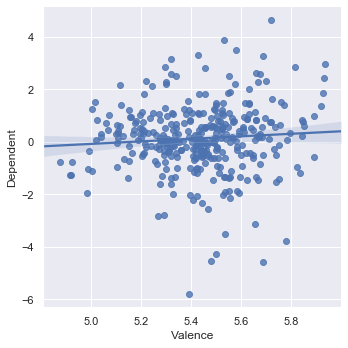

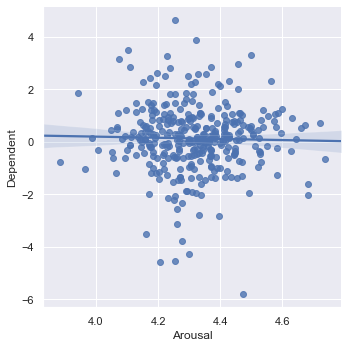

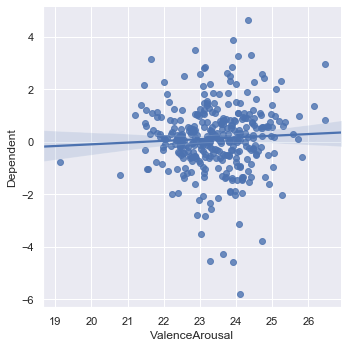

In [0]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt

g = sns.lmplot(x='Valence', y='Dependent', data=df_final_emo)

g = sns.lmplot(x='Arousal', y='Dependent', data=df_final_emo)
               
df_final_emo['ValenceArousal'] = df_final_emo['Valence']*df_final_emo['Arousal']

g = sns.lmplot(x='ValenceArousal', y='Dependent', data=df_final_emo)



In [0]:
df_final_emo = df_final_emo.drop(columns='Dependent')
df_final = df_final.merge(df_final_emo,left_index=True,right_index=True)

df_final

,ending,going,gun,president,heres,tom,apple,book,made,money,...,space,mosque,pizza,otto,warmbier,Earlier,Dependent,Valence,Arousal,ValenceArousal
2016-01-04,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.29,0.84,5.657391,4.233043,23.947983
2016-01-05,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.84,-2.83,5.266923,4.395769,23.152178
2016-01-06,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.83,-2.78,5.292791,4.331860,22.927631
2016-01-07,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,-2.78,-0.13,5.750563,4.264366,24.522508
2016-01-08,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.13,-2.02,5.396327,4.683265,25.272429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-14,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.84,-2.07,5.423729,4.255932,23.083022
2017-06-15,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.07,1.21,5.152623,4.176885,21.521915
2017-06-16,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.21,0.78,5.570000,4.248644,23.664947
2017-06-19,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.78,0.63,5.104407,4.674407,23.860074


In [0]:
'''df_final = df_final.join(oil['Oil_Earlier'])
df_final = df_final.join(gold['Gold_Earlier'])
df_final'''

"df_final = df_final.join(oil['Oil_Earlier'])\ndf_final = df_final.join(gold['Gold_Earlier'])\ndf_final"

In [0]:
# turn 'Earlier' into [0,1]
threshold = 0
df_final['Earlier'] = [1 if val > threshold else 0 for val in df_final['Earlier']]

In [0]:
# decide how much higher the stock needs to be for the classification [0,1]
threshold = 0

df_final['Dependent'] = [1 if val > threshold else 0 for val in df_final['Dependent']]
#df_final['Dependent'] = dep

In [0]:
df_final['Dependent']

2016-01-04    1
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
             ..
2017-06-14    0
2017-06-15    1
2017-06-16    1
2017-06-19    1
2017-06-20    0
Name: Dependent, Length: 348, dtype: int64

In [0]:
'''from sklearn.preprocessing import MinMaxScaler
# normalize
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_final)
normData = pd.DataFrame(min_max_scaler.transform(df_final), index=df_final.index, columns=df_final.columns)
normData'''
#df_final = df_final.dropna()

'from sklearn.preprocessing import MinMaxScaler\n# normalize\nmin_max_scaler = MinMaxScaler()\nmin_max_scaler.fit(df_final)\nnormData = pd.DataFrame(min_max_scaler.transform(df_final), index=df_final.index, columns=df_final.columns)\nnormData'

### 3.1 Learning: RandomForest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# create training and testing vars
y = df_final['Dependent']
X = df_final.iloc[:, df_final.columns != 'Dependent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_test

(278, 752) (278,)
(70, 752) (70,)


,ending,going,gun,president,heres,tom,apple,book,made,money,...,dealings,space,mosque,pizza,otto,warmbier,Earlier,Valence,Arousal,ValenceArousal
2017-03-07,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.486667,4.379778,24.030381
2017-03-08,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.492203,4.232881,23.247845
2017-03-09,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.524516,4.185645,23.123664
2017-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,5.291791,4.448806,23.542152
2017-03-13,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.211111,4.331270,22.570728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-14,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,5.423729,4.255932,23.083022
2017-06-15,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.152623,4.176885,21.521915
2017-06-16,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,1,5.570000,4.248644,23.664947
2017-06-19,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,1,5.104407,4.674407,23.860074


In [0]:
rf = RandomForestRegressor(n_estimators = 1000,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

y_pred[:10]

array([0.487, 0.625, 0.446, 0.34 , 0.591, 0.375, 0.838, 0.697, 0.578,
       0.679])

In [0]:
rf.feature_importances_[:10]

array([0.002005  , 0.0015884 , 0.00304486, 0.06061854, 0.01200953,
       0.00539621, 0.01413201, 0.00038168, 0.00284052, 0.00063858])

In [0]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
columns_sorted = X_train.columns[indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. feature %s (%f)" % (f + 1, columns_sorted[f], importances[indices[f]]))


Feature ranking:
1. feature Valence (0.143133)
2. feature Arousal (0.127554)
3. feature ValenceArousal (0.105360)
4. feature president (0.060619)
5. feature reportedly (0.016575)
6. feature one (0.016210)
7. feature new (0.015305)
8. feature billion (0.015097)
9. feature Earlier (0.014861)
10. feature apple (0.014132)
11. feature big (0.013594)
12. feature heres (0.012010)
13. feature world (0.010609)
14. feature people (0.009029)
15. feature -year-old (0.008122)
16. feature cant (0.006442)
17. feature ted (0.005711)
18. feature billionaire (0.005653)
19. feature ceo (0.005531)
20. feature year (0.005426)


In [0]:
threshold = 0.5
preds = [1 if val > threshold else 0 for val in y_pred]
preds

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [0]:
result = pd.concat([pd.DataFrame(preds,columns=['Predictions_for_dependent']),y_test.reset_index(drop=True)],axis=1)

In [0]:
result

,Predictions_for_dependent,Dependent
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0
...,...,...
65,1,0
66,1,1
67,1,1
68,1,1


In [0]:
print('''
+-----------------+-----------------+
| TRUE POSITIVES  | FALSE POSITIVES |
+-----------------+-----------------+
| FALSE NEGATIVES | TRUE NEGATIVES  |
+-----------------+-----------------+
''')


+-----------------+-----------------+
| TRUE POSITIVES  | FALSE POSITIVES |
+-----------------+-----------------+
| FALSE NEGATIVES | TRUE NEGATIVES  |
+-----------------+-----------------+



In [0]:
print(roc_auc_score(result[['Predictions_for_dependent']], result[['Dependent']]))
print(metrics.confusion_matrix(result[['Predictions_for_dependent']], result[['Dependent']]))
print(accuracy_score(result[['Predictions_for_dependent']], result[['Dependent']]))

0.5148011100832562
[[ 9 14]
 [17 30]]
0.5571428571428572


In [0]:

# try different Thresholds:
thresholds = [0.1,0.2,0.5,1,2]
results = []
results_count = []

for threshold in thresholds:
    
    dep_binary_tmp = [1 if val > threshold else 0 for val in dep]
    results_count.append(Counter(dep_binary_tmp))
    dep_ = np.array(dep_binary_tmp).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(df_final, dep_, test_size=0.2)
    
    y_train = y_train.ravel()
    
    rf = RandomForestRegressor(n_estimators = 10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    y_pred
    
    thresh = 0.5
    preds_tmp = [1 if val > thresh else 0 for val in y_pred]
    
    result = pd.DataFrame([preds_tmp,y_test.ravel()]).T
    
    print(metrics.confusion_matrix(result[0], result[1]))
    print('')
    results.append(accuracy_score(result[0], result[1]))

results


[[ 93   2]
 [ 13 121]]

[[ 99   2]
 [ 14 114]]

[[99 13]
 [33 84]]

[[151  27]
 [ 23  28]]

[[200  27]
 [  1   1]]



[0.9344978165938864,
 0.9301310043668122,
 0.7991266375545851,
 0.7816593886462883,
 0.8777292576419214]

## 3.2 Test Performance

In [0]:
#df = pd.merge(hist, df_final, left_index=True, right_index=True, how='outer')
df = pd.merge(hist, X_test, left_index=True, right_index=True, how='inner')
df = df.fillna(0)
df = df.loc[df_final.index.min():df_final.index.max()]
df

,Open,High,Low,Close,Volume,Dividends,Open_Next_Day,diff,diff_day_earlier,diff_2days_earlier,...,dealings,space,mosque,pizza,otto,warmbier,Earlier,Valence,Arousal,ValenceArousal
2017-03-07,224.25,224.63,223.68,223.91,65103700,0.000,224.23,-0.02,-0.13,-0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.486667,4.379778,24.030381
2017-03-08,224.23,224.51,223.34,223.49,78168800,0.000,223.62,-0.61,-0.02,-0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.492203,4.232881,23.247845
2017-03-09,223.62,224.13,222.72,223.77,90683900,0.000,224.82,1.20,-0.61,-0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.524516,4.185645,23.123664
2017-03-10,224.82,224.87,223.52,224.56,81991700,0.000,224.49,-0.33,1.20,-0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,1,5.291791,4.448806,23.542152
2017-03-13,224.49,224.72,224.13,224.67,57256800,0.000,224.08,-0.41,-0.33,1.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.211111,4.331270,22.570728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-14,232.34,232.35,230.85,231.75,78602300,0.000,230.27,-2.07,0.84,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,1,5.423729,4.255932,23.083022
2017-06-15,230.27,231.44,229.97,231.30,66464900,0.000,231.48,1.21,-2.07,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.152623,4.176885,21.521915
2017-06-16,231.48,231.54,230.39,231.36,84553100,1.183,232.26,0.78,1.21,-2.07,...,2.0,2.0,0.0,0.0,0.0,0.0,1,5.570000,4.248644,23.664947
2017-06-19,232.26,233.35,232.16,233.28,65123800,0.000,232.89,0.63,0.78,1.21,...,0.0,0.0,2.0,2.0,0.0,0.0,1,5.104407,4.674407,23.860074


In [0]:
y_pred = rf.predict(X_test)

In [0]:
order = [1 if sig>0.5 else -1 for sig in y_pred]
order[:10]

[-1, 1, -1, -1, 1, -1, 1, 1, 1, 1]

In [0]:
import random
# add random
random_numbers = [random.sample([1,0],1)[0] for x in range(0,len(order))]
random_numbers[:10]

[1, 1, 0, 0, 1, 1, 1, 0, 0, 1]

In [0]:
spy = df['Open_Next_Day']-df['Open']
profit = spy.values * order
wealth = profit.cumsum()
random_graph = random_numbers * spy.values
print('Total profit made in Test: ', profit.sum())
print('Total profit made in Test with buy and hold: ', spy.sum())
random_graph

Total profit made in Test:  5.409999999999997
Total profit made in Test with buy and hold:  11.169999999999987


array([-0.02, -0.61,  0.  , -0.  , -0.41,  0.36,  1.46, -0.  , -0.  ,
        0.42, -3.51,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.46,  0.41,
       -0.  , -0.  ,  1.2 , -0.  ,  0.  ,  0.  , -0.43, -0.  , -1.05,
       -0.  ,  0.58,  0.  , -0.  ,  1.04,  1.83,  0.69,  0.57,  0.  ,
       -0.  ,  0.15, -0.  ,  0.06,  0.34,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  1.11, -0.53,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , -0.  ,
        0.47,  0.13,  0.  ,  0.  , -0.59,  0.  ,  0.16,  0.  , -0.  ,
        0.  ,  0.  , -0.  ,  1.21,  0.  ,  0.63, -0.  ])

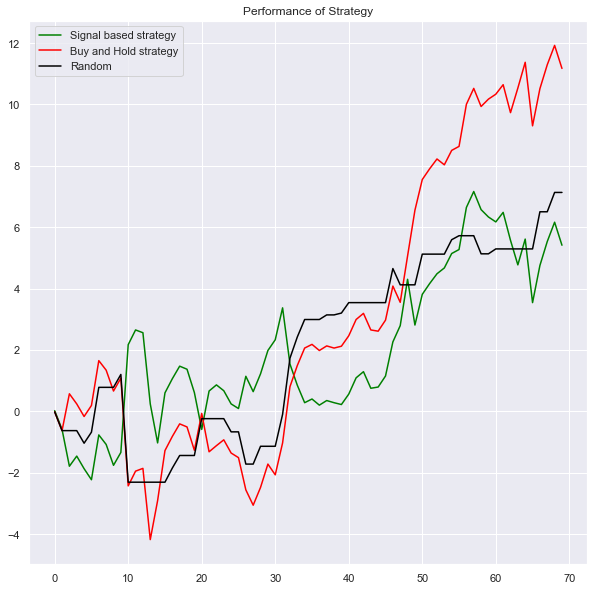

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy')
plt.plot(wealth, color='green', label='Signal based strategy')
plt.plot(spy.cumsum().values, color='red', label='Buy and Hold strategy')
plt.plot(random_graph.cumsum(), color='black', label='Random')
plt.legend()
plt.show()

## 3.3 Learning: Keras

In [0]:
!pip install keras
!pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import categorical_accuracy

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train.values,y_train.values,epochs=50)
score = model.evaluate(X_test.values,y_test.values)


Epoch 1/50
278/278 [==============================] - 1s 4ms/step - loss: 1.2801 - accuracy: 0.3957
Epoch 2/50
278/278 [==============================] - 0s 172us/step - loss: 0.9062 - accuracy: 0.4604
Epoch 3/50
278/278 [==============================] - 0s 176us/step - loss: 0.8332 - accuracy: 0.4640
Epoch 4/50
278/278 [==============================] - 0s 176us/step - loss: 0.7621 - accuracy: 0.5396
Epoch 5/50
278/278 [==============================] - 0s 172us/step - loss: 0.7782 - accuracy: 0.4748
Epoch 6/50
278/278 [==============================] - 0s 265us/step - loss: 0.6891 - accuracy: 0.6115
Epoch 7/50
278/278 [==============================] - 0s 226us/step - loss: 0.6815 - accuracy: 0.5863
Epoch 8/50
278/278 [==============================] - 0s 204us/step - loss: 0.6573 - accuracy: 0.5791
Epoch 9/50
278/278 [==============================] - 0s 262us/step - loss: 0.6472 - accuracy: 0.6223
Epoch 10/50
278/278 [==============================] - 0s 170us/step - loss: 0.6159 

In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
print('test loss, test acc:', score)


# Evaluate on test data
test loss, test acc: [0.7908221857888358, 0.5714285969734192]


## Test Deep Learning Model

In [0]:
import statsmodels.formula.api as smf

In [0]:
pred_y = model.predict(X_test)
pred_y[:10]

array([[0.5170163 ],
       [0.45828384],
       [0.4445299 ],
       [0.7533722 ],
       [0.40293035],
       [0.27845395],
       [0.9181261 ],
       [0.81309175],
       [0.96834   ],
       [0.5234497 ]], dtype=float32)

In [0]:
# Test
order = [1 if sig>0.5 else -1 for sig in pred_y]

Total profit made in Test with Tensorflow:  11.490000000000151
Total profit made in Test with buy and hold:  11.169999999999987


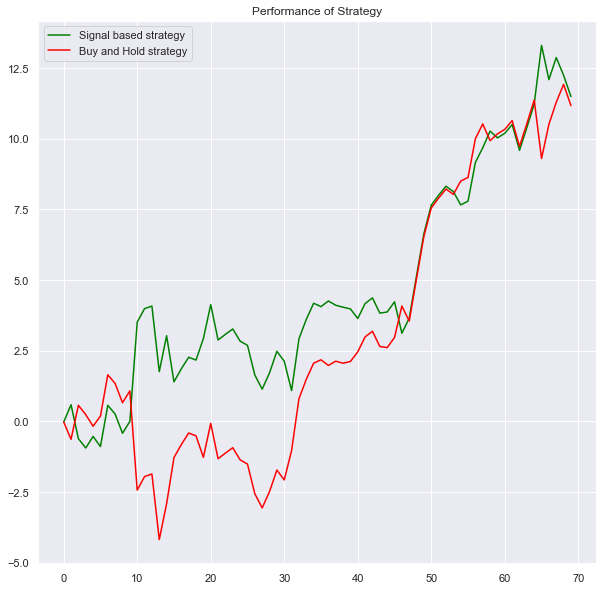

In [0]:
spy = df['Open_Next_Day']-df['Open']
profit = spy.values * order
wealth = profit.cumsum()
print('Total profit made in Test with Tensorflow: ', profit.sum())
print('Total profit made in Test with buy and hold: ', spy.sum())

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy')
plt.plot(wealth, color='green', label='Signal based strategy')
plt.plot(spy.cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()